In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's start simple. How to do you code a mathematical function in python? 

In [2]:
def f(x):
    return x + 5

f(10)

15

But do we really want to go back and edit f(x) every time we want to do something different? We can fix this with python's `eval` function. Using `eval` is generally a no-no and introduces security risks, but it's fine for the purposes of this notebook. It will allow us to express the function as a string.

In [3]:
function = 'x + 5'

def f(x, function=function):
    return eval(function)

f(5)

10

In [4]:
f(10, '2*x + 2')

22

# Graphing

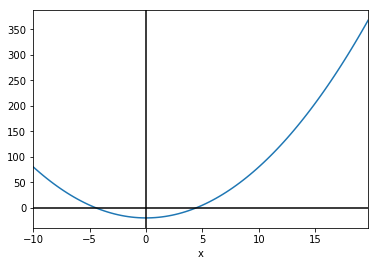

In [5]:
def graph(function=function, tangent=None, xlim=(-10,20), ylim=None):
    df = pd.DataFrame()

    df['x'] = np.arange(xlim[0],xlim[1],(xlim[1]-xlim[0])/100)
    df['y'] = eval(function.replace('x', "df['x']"))
    df = df.set_index('x')

    df.y.plot(ylim=ylim)
    
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

graph('x**2 - 20')

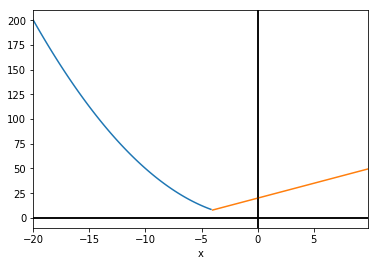

In [6]:
graph('.5*(x**2)', xlim=[-20,-4])
graph('(3*x)+20', xlim=[-4,10])

In [7]:
def limit(x, function=function):
    lower_limit = f(x - .00000001, function=function)
    upper_limit = f(x + .00000001, function=function)
    if np.abs(upper_limit - lower_limit) > 100000:
        print('No limit exists')
        return None
    else:
        L = (lower_limit + upper_limit)/2
        return round(L, 4)

Let's unpack what this function is doing. It gets arbitarily close to f(x) from both above and below, and then takes the average of f(x) at those two values. If there's a massive difference between the upper and lower limits, then no limit exists and it returns `None`.

In [8]:
function = 'x + 5'

limit(9, function=function)

14.0

In [9]:
limit(0, '1/x')

No limit exists


You can do just about anything you need to with this function. For example, what's the limit of $f(x) = 1/x$ as $x$ approaches infinity?

In [10]:
# Limit of f(x) = 1/x, as x -> infinity
limit(np.inf, '1/x')

# Exactly what you'd expect...

0.0

In [11]:
# Limit of f(x) = x, as x -> infinity
limit(np.inf, 'x')

inf

We can calculate the derivative in a similar way: get arbitrarily close to x and then calculate the slope between that point and x.

In [12]:
def f(x, function=function):
    return eval(function)

def derivative(x, function=function):
    h = run = 1/1e10  # also calling it "run" so it's clear what we're calculating
    rise = f(x+h, function=function) - f(x, function=function)
    return round(rise/run,4)

In [13]:
x = 4

derivative(x, '3*x**3 + x**2')

151.9999

In [14]:
derivative(2, 'np.log(x)')

0.5

Now let's make an improved graph function that can also plot derivatives.

In [15]:
# We get the same answer calculating it manually.
9*x**2 + 8

152

Tangent:
y = 298.0x-2068.01


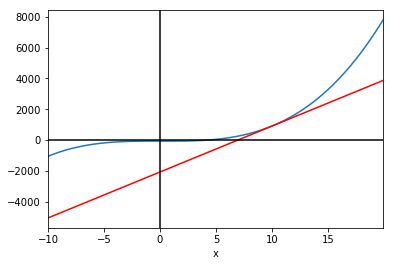

In [16]:
def graph(function=function, tangent=None, xlim=(-10,20), ylim=None):
    df = pd.DataFrame()

    df['x'] = np.arange(xlim[0],xlim[1],.1)
    df['y'] = eval(function.replace('x', "df['x']"))
    df = df.set_index('x')

    df.y.plot(ylim=ylim)
    
    if tangent is not None:
        # Takes a tangent as an x-value
        x_ = tangent
        for i in df.index:
            if np.isclose(x_, i, atol=.01):
                ix = i
                y_ = df.get_value(ix, 'y')
                break
        
        m = derivative(x_, function=function)
        df['tangent'] = (m*df.index)-(m*x_)+y_
        df['tangent'].plot(ylim=ylim, color='red')
        
        # Print tangent line
        print('Tangent:')
        print('y = ' + str(round(m,2)) + 'x', end='')
        for i in df.index:
            if np.isclose(0, i, atol=.01):
                y_intercept = round(df.get_value(i, 'tangent'), 2)
                print(str(y_intercept))
                break
    
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
graph('(x**3 - (3*x-2) + (x-50) - 20)', tangent=10)

In [17]:
def integral(xstart, xfinish, function=function, rectangles=100000):
    width = (xfinish - xstart)/rectangles
    running_sum = 0
    for i in range(int(rectangles)):
        try:
            height = f(xstart + i*width, function=function)
            # each rectangle is 1 width after the previous one
            area = height * width
            running_sum += area
        except:
            continue
    return round(running_sum,4)

Simple example to show it's working: calculate the area of a rectangle

In [18]:
# f(x) = 5
integral(0,10, '5')

50.0

In [19]:
# f(x) = x^2
integral(0,4, 'x**2')

21.333

It's probably easier to do this in scipy. Here's how.

In [20]:
import scipy.integrate as integrate

# Returns a tuple: (result, upper bound on the error)
result, upper_bound = integrate.quad(lambda x: 5, 0, 10)

result

50.0

In [21]:
# Getting fancy!
result, upper_bound = integrate.quad(lambda x: (4*x**3 + 2*x**2)/(5*x), 0, 8)

result

149.33333333333334

# Using SymPy to Calculate Partial Derivatives

In [22]:
from sympy import symbols, diff, sin, exp, sqrt

x, y, z = symbols('x y z', real=True)

f = 6*x*y**2 + x*sin(z) + x**3 + z**8*y
diff(f, x)

3*x**2 + 6*y**2 + sin(z)

What's with that `symbols` bit? To paraphrase Stackoverflow user wtayyeb:

A simple variable will resolve to its value when manipulating. e.g. if x=1 when you use x, the compiler will put 1 instead of x. So we define something (called a symbol instance) and put it in x. Then, when x is used, the symbol will be used and the formula remains uncalculated. It can then be sent to functions like `diff` to work on symbols.

In [23]:
# You can even get really fancy and use imaginary numbers!
i = symbols('i', real=False)

g = 6*x*y**2 + x*sin(z) + x**3 + exp(z) + sqrt(x)/2*i
diff(g, x)

i/(4*sqrt(x)) + 3*x**2 + 6*y**2 + sin(z)